<a href="https://colab.research.google.com/github/RyanbwChien/Fraud_data_LLM_BertModel/blob/main/TIR104_G1_Fraud_Classification_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install transformers
%pip install torch
%pip install onnx onnxruntime

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 38.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 17.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [3]:
import torch
torch.__version__

'2.5.1+cu124'

In [4]:
# ÊäÄË°ìÊñπÊ≥ï
# Ë©ûË¢ãÊ®°Âûã (Bag-of-Words)
# Ë©ûË¢ãÊ®°ÂûãÂ∞áÊñáÊú¨Êñá‰ª∂Ë¶ñÁÇ∫Ë©ûË™ûÁöÑÈõÜÂêàÔºåÂøΩÁï•Ë™ûÊ≥ïÂíåË©ûÂ∫è„ÄÇÂÆÉÈÄöÈÅéË®àÁÆóÊØèÂÄãË©ûÂú®ÊñáÊú¨‰∏≠ÁöÑÂá∫ÁèæÈ†ªÁéáÔºåÂâµÂª∫‰∏ÄÂÄãÊï∏ÂÄºÁâπÂæµÂêëÈáè„ÄÇ
# Ë©ûÈ†ª-ÈÄÜÊñáÊ™îÈ†ªÁéá (TF-IDF)
# TF-IDFÈÄöÈÅéËÄÉÊÖÆË©ûÂú®ÊñáÊ™î‰∏≠ÁöÑÂá∫ÁèæÈ†ªÁéá‰ª•ÂèäÂú®Êï¥ÂÄãË™ûÊñôÂ∫´‰∏≠ÁöÑÈÄÜÈ†ªÁéáÔºåË°®Á§∫Ë©ûÂú®ÊñáÊ™î‰∏≠ÁöÑÈáçË¶ÅÊÄß„ÄÇ
# Ë©ûÂµåÂÖ• (Word Embedding)
# Ë©ûÂµåÂÖ•ÊäÄË°ì (Â¶ÇWord2VecÂíåGloVe) Â∞áË©ûË°®Á§∫ÁÇ∫È´òÁ∂≠ÂêëÈáèÁ©∫Èñì‰∏≠ÁöÑÂØÜÈõÜÂêëÈáèÔºåÊçïÊçâË©û‰πãÈñìÁöÑË™ûÁæ©Èóú‰øÇ„ÄÇ
# Ê©üÂô®Â≠∏ÁøíÁÆóÊ≥ï
# ÂèØ‰ª•‰ΩøÁî®ÊîØÊåÅÂêëÈáèÊ©ü (SVM)„ÄÅÊú¥Á¥†Ë≤ùËëâÊñØ„ÄÅÊ±∫Á≠ñÊ®πÁ≠âÁõ£Áù£Â≠∏ÁøíÁÆóÊ≥ïÈÄ≤Ë°åÊñáÊú¨ÂàÜÈ°ûÔºåÂà©Áî®ÊèêÂèñÁöÑÁâπÂæµ„ÄÇ
# Ê∑±Â∫¶Â≠∏ÁøíÊ®°Âûã
# Ê∑±Â∫¶Â≠∏ÁøíÊ®°ÂûãÔºåÂ¶ÇÂç∑Á©çÁ•ûÁ∂ìÁ∂≤Áµ° (CNN)„ÄÅÂæ™Áí∞Á•ûÁ∂ìÁ∂≤Áµ° (RNN)ÂíåÂü∫ÊñºTransformerÁöÑÊ®°Âûã (Â¶ÇBERT)ÔºåÂú®ÊñáÊú¨ÂàÜÈ°û‰ªªÂãô‰∏≠ÂèñÂæó‰∫ÜÈ°ØËëóÈÄ≤Â±ï„ÄÇ

In [5]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from transformers import AdamW
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#%% Loader data
import re
import json
def preprocess_text(text):
    text = re.sub(r"<br\s*/?>", ". ", text)  # ÊàñËÄÖÊõøÊç¢‰∏∫Á©∫Ê†º
    text = re.sub(r"\s+", " ", text.strip())  # Ê∏ÖÁêÜÂ§ö‰ΩôÁ©∫Ê†º Â¶ÇÊûúÊúâ‰∏ÄÂÄã‰ª•‰∏äÁ©∫ÁôΩÊúÉËÆäÊàê‰∏ÄÂÄãÁ©∫ÁôΩ
    return text
data = pd.read_json(r"/content/drive/MyDrive/Fraud_Model_Dataset.json")
data["Content"] = data["Content"].apply(preprocess_text)

In [7]:
content_len = data["Content"].apply(lambda x:len(x))
content_len_P95 = np.percentile(content_len,95)
print("Ë≥áÊñôÊñáÊú¨Èï∑Â∫¶95%ÁôæÂàÜ‰ΩçÊï∏:",content_len_P95)

retain_content = content_len < content_len_P95
print("ÁßªÈô§>1400Â≠óÁöÑÊñáÊú¨ÂÖ±:",len(content_len) - sum(retain_content),"Á≠Ü")
data = data[retain_content]

Ë≥áÊñôÊñáÊú¨Èï∑Â∫¶95%ÁôæÂàÜ‰ΩçÊï∏: 1391.0
ÁßªÈô§>1400Â≠óÁöÑÊñáÊú¨ÂÖ±: 4074 Á≠Ü


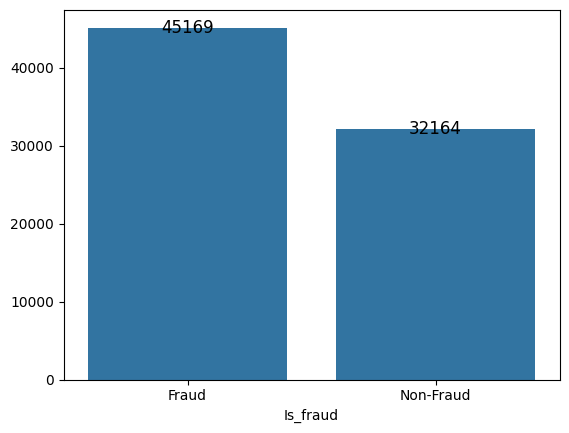

In [8]:
fig, ax = plt.subplots()
label = data["Is_fraud"].apply(lambda x: "Fraud" if x==1 else "Non-Fraud")
counts = label.value_counts()
counts.index
counts.values
sns.barplot(x=counts.index, y=counts.values, ax=ax)

for p in ax.patches:
  height = p.get_height() #ËøîÂõûÊ¢ùÂΩ¢ÂúñÁöÑÈ´òÂ∫¶
  y = p.get_y() #ËøîÂõûÊ¢ùÂΩ¢ÂúñÁöÑÂ∫ïÈÉ®‰ΩçÁΩÆÔºày Ëª∏Ëµ∑ÂßãÈªûÔºâ„ÄÇ
  ax.text(p.get_x()+ (p.get_width()/2), p.get_y() + p.get_height(),str(int(p.get_height()))
      ,ha='center',va='center', fontsize=12)

Fraud: 414.0
Non_Fraud: 561.0


<Axes: title={'center': 'Non_Fraud text length Dist.'}, xlabel='Content', ylabel='Count'>

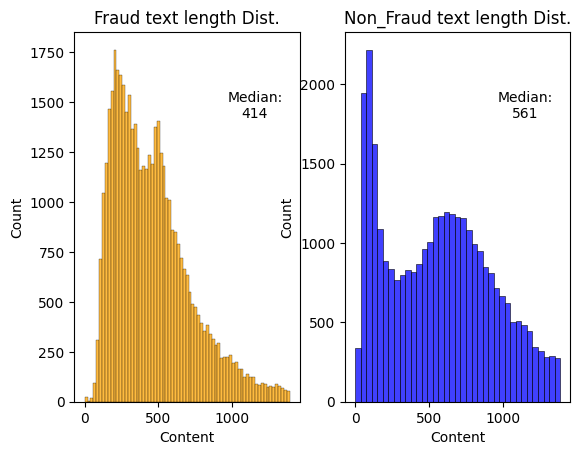

In [9]:
Fraud_len_content = data.query("Is_fraud==1")["Content"].apply(lambda x:len(x))
Non_Fraud_len_content = data.query("Is_fraud==0")["Content"].apply(lambda x:len(x))
print("Fraud:", np.median(Fraud_len_content))
print("Non_Fraud:", np.median(Non_Fraud_len_content))
# np.percentile(len_content,75)
fig, ax = plt.subplots(1,2)
sns.histplot(Fraud_len_content,ax=ax[0],color="orange")
ax[0].set_title("Fraud text length Dist.")
ax[0].text(0.8,0.8, ha='center', va='center',s=f"Median:\n{int(np.median(Fraud_len_content))}", transform=ax[0].transAxes)
ax[1].set_title("Non_Fraud text length Dist.")
ax[1].text(0.8,0.8, ha='center', va='center',s=f"Median:\n{int(np.median(Non_Fraud_len_content))}", transform=ax[1].transAxes)
sns.histplot(Non_Fraud_len_content,ax=ax[1],color="blue")

In [10]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-chinese", num_labels=2)
inputs = tokenizer("‰Ω†Â•ΩÂóé?", return_tensors="pt") #"pt" means return pytorch tensor
inputs

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': tensor([[ 101,  872, 1962, 1621,  136,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [11]:
train, test = train_test_split(data, test_size=0.2, shuffle=True)
train, test = train.reset_index(drop=True), test.reset_index(drop=True)
#Â∞áÁ¥¢ÂºïÈáçË®≠ÁÇ∫Âæû0ÈñãÂßãÁöÑÈÄ£Á∫åÊï∏Â≠óÔºåÈÅøÂÖçÂéü‰æÜÁöÑÁ¥¢Âºï‰∏çÈÄ£Ë≤´ÔºåË®ìÁ∑¥/È©óË≠âÊâç‰∏çÊúÉÂá∫ÈåØ„ÄÇ

In [12]:
class FraudData(Dataset):
    def __init__(self, data, tokenizer):
        self.X = data["Content"]
        self.Y = data["Is_fraud"]
        self.len = len(self.Y)
        self.tokenizer = tokenizer
    def __len__(self):
        return (self.len)
    def __getitem__(self, index):
        # if index >= self.len:
        #     raise StopAsyncIteration
        # else:
        content = tokenizer(self.X[index], return_tensors="pt", padding="max_length",
                            max_length=512, truncation=True)
        # ÈÄôÊÆµÊâçÊòØÊ®°ÂûãÂÖßËÆìÊñáÁ´†Âè™ÂèñÂâç512Â≠ó
        labels = self.Y[index]
        return({
            "input_ids": content["input_ids"].squeeze(0), # ËÆìÂÖ∂‰æø1Á∂≠Â∫¶ ‰ª•‰æøÂæåÁ∫ådataloader batch
            "attention_mask": content["attention_mask"].squeeze(0),
            "labels": torch.tensor(labels, dtype=torch.long),
        })

Fraud_train = FraudData(train, tokenizer)
Fraud_test = FraudData(test, tokenizer)
len(Fraud_train)

61866

In [13]:
batch_size = 16
dataloader_train = DataLoader(Fraud_train, batch_size=batch_size, shuffle=True)#, shuffle=True # Ê≥®ÊÑèÂ¶ÇÊûúDataLoder ÂâçÈù¢Âä†iter ÊúÉËÆì‰πãÂæåË®ìÁ∑¥Ë∑ëËø¥ÂúàÁ¨¨‰∏ÄÊ¨°Ë∑ëÂÆå ÂÖ®ÈÉ®Â∞±ËÆäÁ©∫ÁöÑÔºåÊúÉÊúâÁï∞Â∏∏# dataloader_train = iter(DataLoader(movie_comment_train, batch_size=batch_size, shuffle=True, collate_fn=collate_fn))
test_loader = DataLoader(Fraud_test, batch_size=batch_size, shuffle=True)

In [14]:
# Ë®≠ÁΩÆË®≠ÂÇô
# model.to(device) ÁöÑÂÖ∑È´îÂäüËÉΩÂåÖÊã¨Ôºö

# ÈÅ∑ÁßªÊ®°ÂûãÁöÑÂèÉÊï∏ËàáÈ†ÇÈªûÔºö
# Â∞áÊ®°ÂûãÁöÑÈáçÂ∫¶„ÄÅÂÅèÂ£ìÂíåÂÖ∂‰ªñÂèÉÊï∏ÂæûÂéü‰æÜÁöÑË£ùÁΩÆÔºàÈÄöÂ∏∏ÊòØCPUÔºâÁßªÂãïÂà∞ÁõÆÊ®ôË£ùÁΩÆ„ÄÇ
# ÊîØÊè¥Á°¨È´îÂä†ÈÄüÔºö
# Â¶ÇÊûúÂ∞áÊ®°ÂûãÁßªÂà∞GPUÔºàcudaÔºâÔºåÊ®°ÂûãÁöÑÈÅãÁÆóÂ∞á‰ΩøÁî®GPUË≥áÊ∫êÔºåÈ°ØËëóÂä†ÈÄüË®ìÁ∑¥ÂíåÊé®ÁêÜ„ÄÇ

# Ëã•Âú® GPU ‰∏äÈÄ≤Ë°åÈÅãÁÆóÔºåÂøÖÈ†àÂØ´ model.to(device)ÔºåÂê¶ÂâáÊ®°ÂûãÈªòË™çÊúÉÂú® CPU ‰∏äÈÅãË°å„ÄÇ
# Ëã•Âè™‰ΩøÁî® CPUÔºåÂèØ‰ª•‰∏çÂØ´ model.to(device)Ôºå‰ΩÜ‰ªçÈúÄÁ¢∫‰øùÊ®°ÂûãÂíåÊï∏ÊìöÂú®Áõ∏ÂêåË®≠ÂÇô‰∏ä„ÄÇ

device0 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device0)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
epochs = 3
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
for epoch in range(epochs):
    total_loss = 0
    model.train()
    for batch in tqdm(dataloader_train):  # train_loader is your DataLoader tqdmÈÄ≤Â∫¶Ê¢ù
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device0)
        # print(input_ids.shape ) # torch.Size([16, 512])
        attention_mask = batch["attention_mask"].to(device0)
        labels = batch["labels"].to(device0) #batch["labels"] ÊòØË®ìÁ∑¥Ë≥áÊñô‰∏≠Â∞çÊáâÊØèÂÄãÊ®£Êú¨ÁöÑÊ≠£Á¢∫Ê®ôÁ±§
        # ‰ΩøÁî®ÁöÑÊòØ BertForSequenceClassificationÔºåÈªòËÆ§‰ΩøÁî® CrossEntropyLossÔºåÁ°Æ‰øùÊ†áÁ≠æÊòØÊï¥Êï∞Ê†ºÂºèÔºö
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)#, labels=labels
        logits = outputs.logits
        # print("Logits:", logits) # logits output ÊòØ tensor [batch_size, #labels]
        loss = outputs.loss
        # ÂèçÂêëÂÇ≥Êí≠
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader_train)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.10f}")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3562/3562 [19:50<00:00,  2.99it/s]


Epoch 1, Loss: 0.0196788151


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3562/3562 [19:49<00:00,  2.99it/s]


Epoch 2, Loss: 0.0081035473


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3562/3562 [19:49<00:00,  2.99it/s]

Epoch 3, Loss: 0.0062123655


In [127]:
# 8. È™åËØÅÊ®°Âûã
import torch.nn.functional as F
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device0)
        attention_mask = batch["attention_mask"].to(device0)
        labels = batch["labels"].to(device0)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        # logitsÁî®Êù•Ë°®Á§∫Ê®°ÂûãÁöÑÂéüÂßãËæìÂá∫ÊàñÂæóÂàÜÔºåÂç≥Êú™ÁªèËøá softmax ÁöÑÂæóÂàÜ„ÄÇ
        # Â¶ÇÊûúÈúÄË¶ÅÊ¶ÇÁéáÂàÜÂ∏ÉÔºåÈúÄË¶ÅÊâãÂä®Ë∞ÉÁî® softmax ÂáΩÊï∞ËøõË°åÂΩí‰∏ÄÂåñ„ÄÇ
        # F.softmax(outputs.logits, dim=1) Â∞Ü logits ËΩ¨Êç¢‰∏∫Ê¶ÇÁéá
        preds = torch.argmax(logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

KeyboardInterrupt: 

In [ ]:
# ËÆ°ÁÆóÂáÜÁ°ÆÁéá
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9985


In [ ]:
# save whole model
from google.colab import drive
drive.mount('/content/drive')
save_path = '/content/drive/MyDrive/TIR104_G1_Fraud_Classification_text.pth'
# FILE = 'model_all_test_loss0.0485.pt'
torch.save(model, save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# load model
save_path = '/content/drive/MyDrive/TIR104_G1_Fraud_Classification_text.pth'
model2 = torch.load(save_path,map_location=torch.device('cpu') )
model2.to("cpu")

<ipython-input-28-ca02f9114920>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2 = torch.load(save_path,map_location=torch.device('cpu') )


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# device1 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model2.to(device1)

In [81]:
# ÂàùÂßãÂåñ BERT tokenizer
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")

# ËæìÂÖ•ÊñáÊú¨ÂàóË°®
fraud = ["„ÄêXXÈäÄË°åÈÄöÁü•„ÄëÊÇ®ÁöÑÂ∏≥Êà∂Â≠òÂú®Áï∞Â∏∏‰∫§ÊòìÔºåÂ∑≤Êö´ÊôÇÂáçÁµêÔºåË´ãÁ´ãÂç≥ÈªûÊìä‰ª•‰∏ãÈÄ£ÁµêÈÄ≤Ë°åË∫´‰ªΩÈ©óË≠âÔºå‰ª•ÂÖçÂΩ±Èüø‰ΩøÁî®ÔºÅ",
"„ÄêXXÁâ©ÊµÅ„ÄëÊÇ®ÁöÑÂåÖË£πÂõ†Âú∞ÂùÄÈåØË™§ÁÑ°Ê≥ïÊ¥æÈÄÅÔºåË´ãÈªûÊìäÈÄ£ÁµêÁ¢∫Ë™çÊ≠£Á¢∫Âú∞ÂùÄÔºåÂê¶ÂâáÂ∞áÈÄÄÂõûÁôº‰ª∂‰∫∫„ÄÇüîó [ÈÄ£Áµê]",
"„ÄêÊîøÂ∫úË£úÂä©ÈáëÈÄöÁü•„ÄëÊÅ≠ÂñúÊÇ®Á¨¶Âêà NT$10,000 Áñ´ÊÉÖË£úÂä© Áî≥Ë´ãË≥áÊ†ºÔºåË´ãÈªûÊìä‰ª•‰∏ãÈÄ£ÁµêÁôªË®òÈ†òÂèñÔºÅüîó [ÈÄ£Áµê]",
"„ÄêÈôêÊôÇÊäïË≥áÊ©üÊúÉ„ÄëXX ËÇ°Á•ûÂÖßÈÉ®Êé®Ëñ¶ÔºåÈ´òÂ†±ÈÖ¨‰ΩéÈ¢®Èö™ÔºåÊäïË≥á NT$10,000 Áç≤Âà© 100%ÔºÅÊ©üÊúÉÊúâÈôêÔºåÁ´ãÂç≥Âä†ÂÖ•ÔºÅ",
"„ÄêÁ∑äÊÄ•ÈÄöÁü•„ÄëÊÇ®Â•ΩÔºÅÊàëÊòØÈÜ´Èô¢ÊÄ•Ë®∫ÂÆ§ÔºåÊÇ®ÁöÑÂ≠©Â≠êÁôºÁîüËªäÁ¶çÔºåÊÄ•ÈúÄÈÜ´ÁôÇË≤ªÁî® NT$50,000ÔºåË´ãÁ´ãÂç≥ËÅØÁπ´ÊàëÂÄëÔºÅüìû [ÈõªË©±]",
"„ÄêË≠¶ÊñπÈÄöÁü•„ÄëÊÇ®ÁöÑË∫´‰ªΩÊ∂âÂèä‰∏ÄÂÆóÈáçÂ§ßÊ°à‰ª∂ÔºåË´ãÁ´ãÂç≥ËÅØÁπ´ XX Ë≠¶ÂÆòÔºàÈõªË©±Ôºö[ÈõªË©±]ÔºâÔºåÂê¶ÂâáÂ∞á‰æùÊ≥ïÊãòÊçïÔºÅ",
"„ÄêÁ∑äÊÄ•Ë≠¶Âëä„ÄëÊÇ®ÁöÑÈäÄË°åÂç°Âõ†Áï∞Â∏∏‰∫§ÊòìÂ∑≤Ë¢´ÈéñÂÆöÔºåË´ãÁ´ãÂç≥ÈÄöÈÅéÈÄôÂÄãÈèàÊé•Ëß£ÈéñÔºåÂê¶ÂâáÂ∞áÁÑ°Ê≥ïÁπºÁ∫å‰ΩøÁî®ÔºÅ",
"„ÄêÈôêÊôÇÂÑ™ÊÉ†„ÄëÊÅ≠ÂñúÊÇ®Áç≤Âæó50%ÁöÑË≥ºÁâ©ÊäòÊâ£ÔºÅË´ãÈªûÊìä‰∏ãÈù¢ÁöÑÈèàÊé•Ôºå‰∏¶Ëº∏ÂÖ•ÊÇ®ÁöÑÂç°Ëôü‰ª•‰æøÈ†òÂèñÊÇ®ÁöÑÂÑ™ÊÉ†ÔºÅ",
"„ÄêÂÅΩÈÄ†ÈÄöÁü•„ÄëÊÇ®ÁöÑ‰ø°Áî®Âç°Â≠òÂú®Ê¨∫Ë©ê‰∫§ÊòìÔºåË´ãÂú®10ÂàÜÈêòÂÖßÈªûÊìäÈèàÊé•‰ª•Èò≤Ê≠¢Â∏≥Êà∂Ë¢´ÂáçÁµêÔºÅ",
"„ÄêÁ™ÅÁôºÁãÄÊ≥Å„ÄëÊÇ®ÁöÑÂÄã‰∫∫Ë≥áÊñôË¢´Ê≥ÑÈú≤ÔºåË´ãÁ´ãÂç≥Êõ¥Êñ∞ÊÇ®ÁöÑ‰ø°ÊÅØ‰∏¶Êèê‰æõË∫´‰ªΩË≠âËôüÁ¢º‰ª•‰æø‰øùË≠∑ÊÇ®ÁöÑË≥¨Êà∂ÔºÅ"]

non_fraud = [
"„ÄêÈ§êÂª≥ÂÑ™ÊÉ†„ÄëÊÑüË¨ùÊÇ®ÁöÑÂÖâËá®ÔºÅ‰ªäÂ§©ÂèØ‰ª•‰∫´ÊúâÂÖ®È§ê8ÊäòÂÑ™ÊÉ†ÔºåË´ãÂêëÊúçÂãôÂì°Âá∫Á§∫Ê≠§Ë®äÊÅØ‰ª•‰∫´ÊäòÊâ£ÔºÅ",
"„ÄêGoogle„ÄëÊÇ®ÁöÑÂ∏≥Êà∂Ë®≠ÁΩÆÂ∑≤ÊàêÂäüÊõ¥Êñ∞ÔºåË´ãÁ¢∫Ë™çÊõ¥ÊîπÊòØÂê¶Ê≠£Á¢∫Ôºå‰∏¶ÁπºÁ∫å‰∫´ÂèóÊàëÂÄëÁöÑÊúçÂãô",
"‰∏≠ËèØÈõª‰ø°ÊÅ≠ÂñúÊÇ®Áç≤Âæó‰∏âÊòüGalaxy S25ÊóóËâ¶Á≥ªÂàóÊâãÊ©üÂÑ™ÊÉ†Âä†Á¢ºË≥áÊ†ºÔºåÂç≥Êó•Ëµ∑Ëá≥3/31ÔºåÊÜëÊ≠§Á∞°Ë®ä‰ª•‰∏âÊòüÊåáÂÆöÊ©üÂûãËàäÊèõÊñ∞ÔºåÊê≠ÈÖçÁ≤æÈáá5GÊúàÁπ≥999ÂÖÉ‰ª•‰∏äÊñπÊ°àË≥ºË≤∑Galaxy S25ÊóóËâ¶Á≥ªÂàóÊâãÊ©üÔºåÂç≥‰∫´Âä†Á¢ºÊäòÂÉπÊúÄÈ´ò5,000ÂÖÉÔºå‰∏¶ÂèØÂêåÊôÇ‰∫´ÊúâÂ§öÈáç‰∏≠ËèØÈõª‰ø°Áç®ÂÆ∂ÂÑ™ÊÉ†„ÄÇËΩâÁôºÁÑ°ÊïàÔºåË©≥Ê¥Ω123ÂÆ¢Êúç„ÄÇ",
"„Äê‰∏≠ËèØÈõª‰ø°ÈÄöÁü•„ÄëÊà™Ëá≥2/23ÊÇ®Â∞öÊúâ2800ÈªûÊú™‰ΩøÁî®Ôºå‚ú®Êé®Ëñ¶ÊäµÊèõ„ÄåÁà≠ÈÆÆÈ§êÈ£≤„ÄÅÁéãÂìÅÈõÜÂúò„ÄÅUberEats„ÄçÈÄ£ÂÅáËÅöÈ§êÈ¶ñÈÅ∏ÔºÅhttps://cht.tw/x/7ugav ‚úÖHami PointÂØ¶ÈöõÈªûÊï∏È§òÈ°ç‰ª•Á≥ªÁµ±ÁÇ∫Ê∫ñ‚úÖ[1Èªû=1ÂÖÉ ÁµêÂ∏≥ÁèæÊäµ]",
"„ÄêÂÅ•Ë∫´ÊàøÈÄöÁü•„ÄëÊÑüË¨ùÊÇ®Âä†ÂÖ•ÊàëÂÄëÁöÑÂÅ•Ë∫´Ë®àÂäÉÔºåÊÇ®ÁöÑÊúÉÂì°Âç°Â∑≤Á∂ìÊøÄÊ¥ªÔºåÂèØ‰ª•Èö®ÊôÇÂâç‰æÜÈÅãÂãïÔºÅ",
"„ÄêApple„ÄëÊÇ®ÁöÑÂ∏≥Êà∂Â∑≤ÊàêÂäüË®≠ÁΩÆÈõôÈáçË™çË≠âÔºåÂ¢ûÂº∑‰∫ÜÊÇ®ÁöÑÂ∏≥Êà∂ÂÆâÂÖ®ÊÄß„ÄÇ",
"„Äê‰∫ûÈ¶¨ÈÅú„ÄëÊÑüË¨ùÊÇ®ÈÅ∏ÊìáÊàëÂÄëÔºÅÊÇ®ÁöÑË®ÇÂñÆÂ∑≤Á∂ìËôïÁêÜÂÆåÁï¢ÔºåÈ†êË®àÊñºÊòéÊó•ÈÄÅÈÅî„ÄÇ",
"„ÄêTwitter„ÄëÊÇ®ÁöÑË≥¨Êà∂Â∑≤ÂïüÁî®Êñ∞ÁöÑÈö±ÁßÅË®≠ÁΩÆÔºåË´ãÊ™¢Êü•Ë®≠ÁΩÆ‰ª•Á¢∫‰øùÈö±ÁßÅ‰øùË≠∑„ÄÇ",
"„ÄêÂ†±Á¥ôË®ÇÈñ±„ÄëÊÇ®ÁöÑË®ÇÈñ±Â∑≤ÊàêÂäüÁ∫åË®ÇÔºåË¨ùË¨ùÊÇ®Â∞çÊàëÂÄëÁöÑÊîØÊåÅÔºÅ",
"„ÄêAmazon Prime„ÄëÊÅ≠ÂñúÊÇ®ÊàêÂäüÂçáÁ¥öÁÇ∫Amazon PrimeÊúÉÂì°Ôºå‰∫´ÂèóÊõ¥Â§öÂ∞àÂ±¨Á¶èÂà©ÔºÅ"
]

texts = fraud + non_fraud

texts = list(map(lambda x: preprocess_text(x), texts))
all_labels = [1]*10+[0]*10
for i in texts:
  preprocess_text(i)

# ‰ΩøÁî® tokenizer ËøõË°åÊ†áËÆ∞ÂåñÂπ∂Â°´ÂÖÖ
tokens = tokenizer(
    texts,                      # ËæìÂÖ•ÊñáÊú¨
    padding=True,                # Â°´ÂÖÖÊ†∑Êú¨
    truncation=True,             # Ë∂ÖËøá max_length Êà™Êñ≠
    max_length=512,              # ÊúÄÂ§ßÈïøÂ∫¶ÈôêÂà∂
    return_tensors="pt"          # ËøîÂõû PyTorch Âº†Èáè
)

# ËæìÂá∫Â°´ÂÖÖÂêéÁöÑÊï∞ÊçÆ
input_ids = tokens["input_ids"].to("cpu")    # Token IDs shape: (batch_size, seq_length)
attention_mask = tokens["attention_mask"].to("cpu")  # Attention mask shape: (batch_size, seq_length)
# outputs = model(**inputs)

In [82]:
import torch.nn.functional as F
model2.eval()
outputs = model2(input_ids, attention_mask=attention_mask)
logits = outputs.logits

È†êÊ∏¨ÂÄº [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
È†êÊ∏¨ÂÄº [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Validation Accuracy: 0.80
Recall Rate: 0.90
Precision: 0.75
F1 Score: 0.82


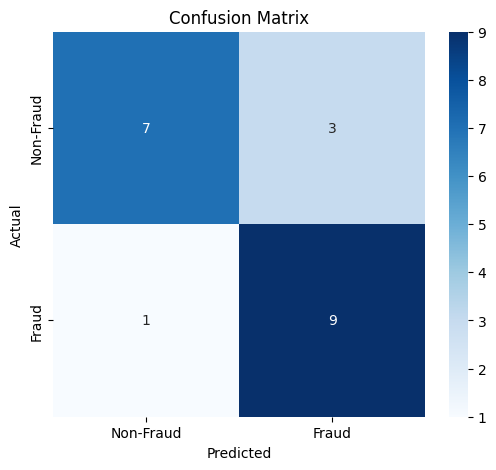

In [87]:
all_preds = torch.argmax(logits, dim=-1)
Fraun_prob = F.softmax(logits,dim=-1)[:,1]
print("È†êÊ∏¨ÂÄº",all_preds.tolist())
print("È†êÊ∏¨ÂÄº",all_labels)
# print("È†êÊ∏¨Ë©êÈ®ôÊ©üÁéá",[round(i,2) for i in Fraun_prob.tolist()])
# ËÆ°ÁÆóÂáÜÁ°ÆÁéá
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
accuracy = accuracy_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Recall Rate: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
# ËÆ°ÁÆóÊ∑∑Ê∑ÜÁü©Èòµ
cm = confusion_matrix(y_true=all_labels, y_pred=all_preds)
# ÁªòÂà∂Ê∑∑Ê∑ÜÁü©ÈòµÁÉ≠ÂäõÂõæ
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()